In [1]:
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
X = []
y = []
str_date = []
with open('top1.txt', 'r') as file:
    for line in file:
        date, value = line.split()
        str_date.append(date)
        date = datetime.datetime.strptime(date, "%m.%Y").date().toordinal()
        X.append(date)
        y.append(float(value))
X = np.array(X).reshape(-1, 1)
y = np.array(y)


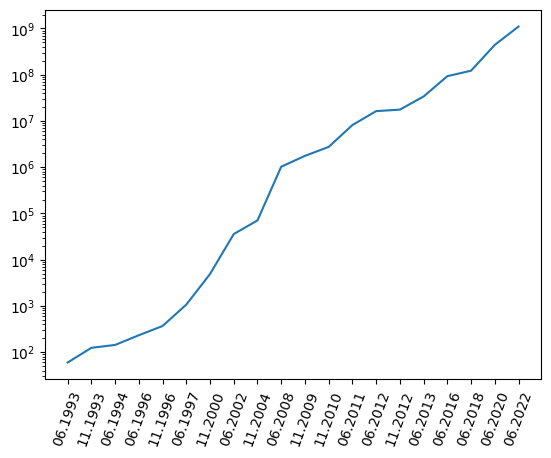

In [3]:
plt.yscale('log')
plt.tick_params(axis='x', rotation=70)
plt.plot(str_date, y)

In [23]:
model = LinearRegression()
poly = PolynomialFeatures(degree=50, include_bias=True)
X_new = poly.fit_transform(X)

In [27]:
model.fit(X_new, y)
forcast_date = '11.2025'
X_pred = datetime.datetime.strptime(forcast_date, "%m.%Y").date().toordinal()
X_pred_new = poly.fit_transform([[X_pred]])
y_pred = model.predict(X_pred_new)

print(f'Прогноз на {forcast_date} : {round(y_pred[0] / 1e9, 3)} Exaflop/s')

Прогноз на 11.2025 : 1.187 Exaflop/s


In [31]:
import pandas as pd

In [33]:
data = pd.read_excel('TOP500_202206.xlsx')

In [52]:
overall_Rmax = data['Rmax [TFlop/s]'].sum()

In [53]:
known_Rmax = data['Rmax [TFlop/s]'][pd.notna(data['Power (kW)'])].sum()

In [54]:
known_power = data['Power (kW)'][pd.notna(data['Power (kW)'])].sum()


In [56]:
print(f'Мощность всех компьютеров из TOP-500 примерно {int(known_power / known_Rmax * overall_Rmax)} kW')

Мощность всех компьютеров из TOP-500 примерно 467496 kW
